In [18]:
from pathlib import Path
import pandas as pd
from glob import glob

metrics_files = glob("out/*/metrics.csv")
print(f"Found {len(metrics_files)} metric files.")



def load_fixed_csv(path):
    # Read raw lines
    with open(path, "r") as f:
        lines = [line.strip() for line in f if line.strip()]

    headers = lines[0].split(",")
    values  = lines[1].split(",")

    if "target_snr" in headers:
        idx = headers.index("target_snr")
        del headers[idx]

    # Create DataFrame
    df = pd.DataFrame([values], columns=headers)
    return df



if not metrics_files:
    print("No files found for pattern: out/*/metric.csv")
    metrics = pd.DataFrame()
else:
    frames = []
    for path in metrics_files:
        df = load_fixed_csv(path)
        frames.append(df)
    metrics = pd.concat(frames, ignore_index=True, sort=False)

Found 951 metric files.


In [19]:
metrics

,detector,gps,inject,seed,achieved_snr,lnz_noise,lnz_signal,lnz_signal_err,lnz_glitch,lnz_glitch_err,logBF_sig_alt,snr_mf_sig,snr_mf_glitch,snr_excess
0,H1,1187722234.0,signal,763,81.06427173420357,1308.791273,-36012076579481.000000,1.309561,-32533862250.249908,0.898902,-36012076580789.789062,-0.390210,-3.092980,81.064272
1,H1,1187722482.0,noise,948,,7880.207457,7812.548908,0.064153,-2989368754.023095,1.140050,-67.658549,-0.000000,0.000000,0.000004
2,H1,1187721782.0,glitch,425,15.880255957806158,7722.866456,7670.056565,0.142301,-418635120531.162964,1.002543,-52.809891,4.210027,-7.268848,12.277509
3,H1,1187721802.0,signal,439,64.40160380243066,3732.640880,6001.088253,0.848345,-671248198583.306885,1.414214,2268.447373,49.451440,-1.821011,64.401604
4,H1,1187721382.0,glitch,125,21.0586648101601,7700.739535,7645.283950,0.221909,-32545695.006381,0.999067,-55.455585,3.221603,1.136518,12.888933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,H1,1187722010.0,glitch,596,54.18962807412924,7620.022976,7572.446439,0.097320,7750.345141,0.160587,-177.898702,4.641840,13.559384,14.772546
947,H1,1187721226.0,signal,7,85.19015978282351,622.844101,4741.473504,1.050512,861.158965,0.060562,3880.314540,65.815285,17.976565,85.190160
948,H1,1187721470.0,noise,189,,7880.207457,7812.656419,0.070105,-314637601.291357,1.068400,-67.551037,0.000000,0.000000,0.000005
949,H1,1187721654.0,glitch,329,76.06366293780673,7558.612305,7522.098776,0.203378,-2229957.213043,0.987138,-36.513529,6.411831,8.325799,16.316401


/tmp/ipykernel_3093988/3260434332.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(categories))


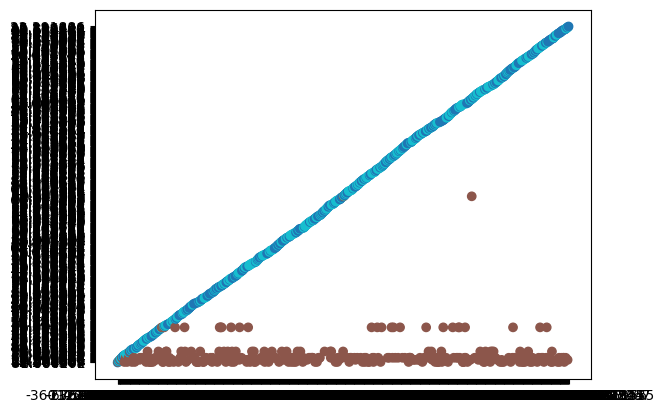

In [25]:
import matplotlib.pyplot as plt

categories = metrics.inject.unique()
colors = plt.cm.get_cmap("tab10", len(categories))
color_dict = {cat: colors(i) for i, cat in enumerate(categories)}
plt.scatter(metrics.logBF_sig_alt, metrics.snr_excess, color=metrics.inject.map(color_dict))

In [29]:
import numpy as np
plt.hist(np.abs(metrics.snr_mf_sig), bins=30)


TypeError: bad operand type for abs(): 'str'